# Import library

In [12]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


# Load and Preprocess Images

In [13]:
# Path to extracted training images
DATADIR = "train"
CATEGORIES = ["dog", "cat"]
IMG_SIZE = 64  # Resize to 64x64 for speed

data = []

# Read and resize images
for category in CATEGORIES:
    path = os.path.join(DATADIR)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
        if category in img:
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([resized, class_num])
            except Exception as e:
                pass


# Prepare Features and Labels

In [14]:
# Shuffle and split data
import random
random.shuffle(data)

X = []
y = []

for features, label in data[:5000]:  # Limit to 5000 for speed
    X.append(features.flatten())
    y.append(label)

X = np.array(X) / 255.0  # Normalize
y = np.array(y)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train the svc model

In [15]:
# svc = SVC(kernel='linear') 
# svc.fit(X_train, y_train)
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_train, y_train)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


# Evaluate the Model

In [17]:
y_pred = svc_rbf.predict(X_test)

# Accuracy report
print(classification_report(y_test, y_pred, target_names=CATEGORIES))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

         dog       0.65      0.61      0.63       495
         cat       0.64      0.68      0.66       505

    accuracy                           0.64      1000
   macro avg       0.64      0.64      0.64      1000
weighted avg       0.64      0.64      0.64      1000

[[302 193]
 [164 341]]


# Test on a New Image

Prediction: dog


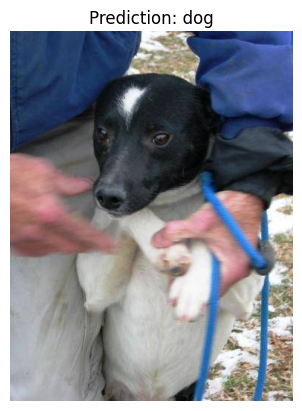

In [18]:
def predict_image(image_path):
    try:
        # Load grayscale for processing
        img_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img_gray is None:
            raise FileNotFoundError(f"Image not found: {image_path}")

        # Preprocess
        img = cv2.resize(img_gray, (IMG_SIZE, IMG_SIZE)).flatten().reshape(1, -1) / 255.0

        # Predict
        prediction = svc_rbf.predict(img)
        label = CATEGORIES[prediction[0]]
        print("Prediction:", label)

        # Load color image for display
        img_color = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

        # Display the image
        plt.imshow(img_rgb)
        plt.title(f"Prediction: {label}")
        plt.axis('off')
        plt.show()
        
    except Exception as e:
        print("Error:", str(e))

# Example usage
predict_image("test1/1.jpg")


